In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data

In [2]:
class Deck():
    """ Create a deck class """
    
    suits = ["C", "D", "H", "S"]
    values = [2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K", "A"] 
    def __init__(self, number=1, suits=suits, values=values):
        self.num_decks = number
        # We don't need the suits for Black Jack
        self.deck = [i for i in values for j in suits for k in range(number)]
        
    def shuffle_deck(self):
        np.random.shuffle(self.deck)
        
    def deal(self):
        return self.deck.pop(0)

In [3]:
test_deck = Deck(2)
test_deck.deck[:5]

[2, 2, 2, 2, 2]

In [4]:
test_deck.shuffle_deck()
test_deck.deck[:5]

[6, 'K', 10, 9, 'J']

In [5]:
test_deck.deal()

6

In [6]:
test_deck.deck[:5]

['K', 10, 9, 'J', 'J']

In [7]:
class play_blackjack():
    """ Play a game of blackjack with just the dealer and one player """
    def __init__(self):
        self.deck = Deck(8)
        
    def play(self):
        self.deck.shuffle_deck()
        self.dealer_hand = []
        self.player_hand = []
        self.dealer_hand.append(self.deck.deck.pop(0))
        self.player_hand.append(self.deck.deck.pop(0))
        self.dealer_hand.append(self.deck.deck.pop(0))
        self.player_hand.append(self.deck.deck.pop(0))
        
    def hit(self, hand):
        hand.append(self.deck.deck.pop(0))

In [8]:
game = play_blackjack()
game.play()

In [9]:
game.dealer_hand

[2, 'Q']

In [10]:
game.player_hand

[4, 'Q']

In [11]:
game.hit(game.player_hand)
game.player_hand

[4, 'Q', 'J']

In [12]:
def get_points(hand):
    
    # We want to track how the Ace was counted, if any
    # Whether it was a 1 or 11
    # So we want a tuple of (points, Ace_value)
    points = (0, 0)
    
    # replicate the original list
    cards = [i for i in hand]
    
    # If there's an Ace in the hand, take it out first
    # And count how many Aces there are
    has_A = 0
    while "A" in cards:
        has_A += 1
        cards.remove("A")
        
    # Get total points for all other cards
    try:
        if len(cards) > 0:
            for i in cards:
                try:
                    points = (points[0] + int(i), 0)
                except:
                    points = (points[0] + 10, 0)
    except:
        print (cards)
        print (type(cards))
    # Deal with the Ace if there was at least one
    
    for i in range(has_A):
        if type(points) == tuple:
            if points[0] + 11 <= 21:
                points = [(points[0] + 11, 11), (points[0] + 1, 1)]
            else:
                points = [(points[0] + 1, 1)]
        else:
            new_points = []
            for j in points:
                if j[0] + 11 <= 21:
                    new_points.extend([(j[0] + 11, 11), (j[0] + 1, 1)])
                else:
                    new_points.extend([(j[0] + 1, 1)])
            points = new_points
    
    # Now, points could be a list of tuples or a tuple
    if type(points) == list:
        # Sort the list by number of points in descending order
        points.sort(reverse=True)
        new_points = [i for i in points if i[0] <= 21]
        
        try:
            if len(new_points) == 0:
                # if there are no items in new_points
                # return the smallest item
                return points[-1]
            else:
                return new_points[0]
        except:
            print (new_points)
            print (type(new_points))
    else:
        return points

In [13]:
get_points(["A", "K", 9, 9])

(29, 1)

In [130]:
def simulate_game(strategy="random"):
    game = play_blackjack()
    game.play()
    dealer_open, dealer_closed = game.dealer_hand
    player_card_one, player_card_two = game.player_hand
    dealer_original = get_points(game.dealer_hand)[0]
    player_original = get_points(game.player_hand)[0]
    
    dealer_hit = 0
    # Check if the dealer needs to hit
    dealer = game.dealer_hand
    # Dealer hits below 17
    while get_points(dealer)[0] < 17:
        game.hit(dealer)
        dealer_hit += 1
    
    # If dealer is at 17, check if it's a soft 17
    # if yes, hit

    if "A" in dealer and get_points(dealer)[0] <= 17:
        game.hit(dealer)
        dealer_hit += 1
    
    player_hit = 0
    player = game.player_hand
    
    # Change dealer_open to numerical
    if dealer_open in ["J", "Q", "K"]:
        dealer_open = 10
    elif dealer_open == "A":
        dealer_open = 1
        
    if strategy == "random":
        # Randomize it for the player
        while get_points(player)[0] < 21:
            if np.random.random() <= 0.5:
                game.hit(player)
                player_hit += 1
            else:
                break
    elif strategy == "recommended":
        # From lasvegas-how-to.com
        # Stand on a hand of 17 or more 
        # Never hit on 12, 13, 14, 15 or 16 when the dealer is showing 16 or less
        # Always split 8's
        # Double down on 11 if dealer is showing 17 or less
        if dealer_open < 7:
#             print (get_points(player)[0])
            while get_points(player)[0] < 12:
                game.hit(player)
#                 print (player)
                player_hit += 1
        else:
            while get_points(player)[0] < 17:
                game.hit(player)
                player_hit += 1
        
    dealer_final = get_points(dealer)[0]
    player_final = get_points(player)[0]
    
    dealer_busts = dealer_final > 21
    player_busts = player_final > 21
    
    
    player_wins = dealer_busts or (player_final > dealer_final and not player_busts)
    
    
    
    return [dealer_open, dealer_closed, dealer_original, dealer_hit, dealer_final, int(dealer_busts), 
            player_card_one, player_card_two, player_original, player_hit, player_final, int(player_busts), 
            int(player_wins), strategy]

In [136]:
ran_strat = [simulate_game() for _ in range(100000)]

In [137]:
rec_strat = [simulate_game(strategy="recommended") for _ in range(100000)]

In [138]:
data = []
data.extend(ran_strat)
data.extend(rec_strat)
data[:5]

[[1, 5, 16, 2, 22, 1, 3, 'J', 13, 0, 13, 0, 1, 'random'],
 [2, 'J', 12, 1, 21, 0, 6, 7, 13, 0, 13, 0, 0, 'random'],
 [10, 3, 13, 1, 18, 0, 'K', 8, 18, 0, 18, 0, 0, 'random'],
 [10, 9, 19, 0, 19, 0, 6, 'Q', 16, 1, 26, 1, 0, 'random'],
 [5, 9, 14, 2, 23, 1, 6, 8, 14, 0, 14, 0, 1, 'random']]

In [139]:
df = pd.DataFrame(data, columns=["dealer_open", "dealer_closed", 
                               "dealer_original", "dealer_hit", 
                               "dealer_final", "dealer_busts", 
                               "player_card_one", "player_card_two", 
                               "player_original", "player_hit", 
                               "player_final", "player_busts", 
                               "player_wins", "strategy"])

In [140]:
old_data = pd.read_csv("blackjack.csv")
df = pd.concat([old_data, df])

In [141]:
# Save so we can add to it next time
df.to_csv("blackjack.csv", index=False)

In [142]:
df.shape

(400000, 14)

In [143]:
df.head()

,dealer_open,dealer_closed,dealer_original,dealer_hit,dealer_final,dealer_busts,player_card_one,player_card_two,player_original,player_hit,player_final,player_busts,player_wins,strategy
0,10,4,14,1,24,1,10,K,20,1,25,1,1,random
1,2,J,12,1,22,1,10,K,20,0,20,0,1,random
2,9,10,19,0,19,0,10,A,21,0,21,0,1,random
3,10,3,13,1,20,0,Q,8,18,0,18,0,0,random
4,3,7,10,2,26,1,6,8,14,1,24,1,1,random


# Analyze data

In [144]:
df = pd.read_csv("blackjack.csv")

In [145]:
dealer_hands = pd.pivot_table(df, index=["dealer_open", "dealer_closed"], 
                              values=["dealer_busts", "player_wins"], aggfunc=[len, sum])
dealer_hands.reset_index(inplace=True)
dealer_hands.columns = dealer_hands.columns.values
del dealer_hands[('len', 'player_wins')]
dealer_hands.columns = ["dealer_open", "dealer_closed", "total", "dealer_busts", "player_wins"]
dealer_hands.head()

,dealer_open,dealer_closed,total,dealer_busts,player_wins
0,1,10,2336,0,0
1,1,2,2331,734,972
2,1,3,2362,834,1091
3,1,4,2428,899,1136
4,1,5,2371,918,1131


In [146]:
player_hands = pd.pivot_table(df, index=["player_card_one", "player_card_two", "player_original"], 
                              values=["player_busts", "player_wins"], aggfunc=[len, sum])
player_hands.reset_index(inplace=True)
player_hands.columns = player_hands.columns.values
del player_hands[('len', 'player_wins')]
player_hands.columns = ["player_card_one", "player_card_two", "player_original", "total", "player_busts", "player_wins"]
player_hands.head()

,player_card_one,player_card_two,player_original,total,player_busts,player_wins
0,10,10,20,2283,547,1358
1,10,2,12,2362,585,862
2,10,3,13,2344,681,864
3,10,4,14,2354,720,819
4,10,5,15,2450,815,825


## Dealer

We only get to see the dealer's open card, so that's the only one we care about.

In [148]:
dealer_open_hand = dealer_hands.groupby("dealer_open").sum().reset_index()
dealer_open_hand["percent_dealer_busts"] = dealer_open_hand["dealer_busts"] / dealer_open_hand["total"]
dealer_open_hand["percent_player_wins"] = dealer_open_hand["player_wins"] / dealer_open_hand["total"]
dealer_open_hand

,dealer_open,total,dealer_busts,player_wins,percent_dealer_busts,percent_player_wins
0,1,30628,4015,7349,0.131089,0.239944
1,2,30866,11410,14766,0.369662,0.478390
2,3,30973,12117,15354,0.391212,0.495722
3,4,30850,12556,15732,0.407002,0.509951
4,5,30398,12969,15993,0.426640,0.526120
5,6,30734,13696,16896,0.445630,0.549749
6,7,30498,8257,15157,0.270739,0.496983
7,8,30566,7572,13939,0.247726,0.456030
8,9,31094,7447,13161,0.239500,0.423265
9,10,123393,27173,44963,0.220215,0.364389


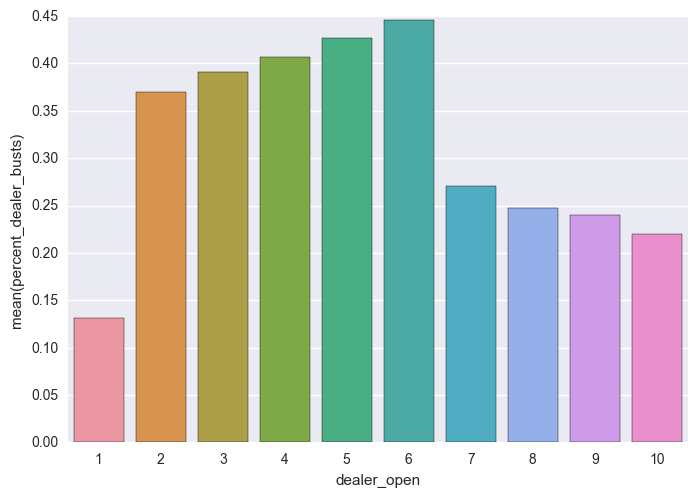

In [149]:
sns.barplot(x="dealer_open", y="percent_dealer_busts", data=dealer_open_hand);
plt.show();

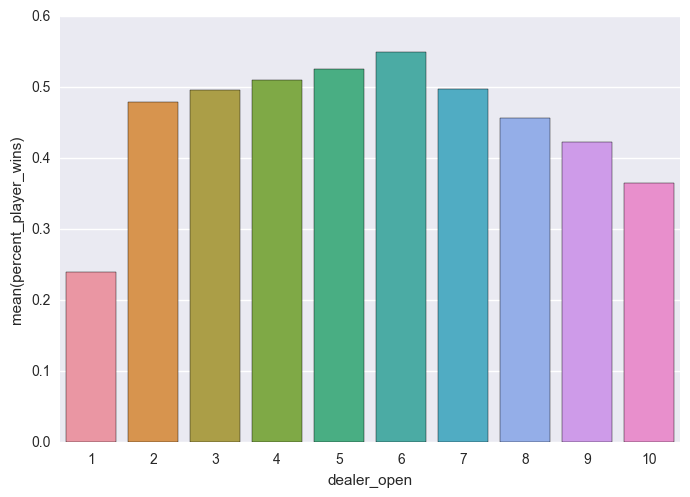

In [150]:
sns.barplot(x="dealer_open", y="percent_player_wins", data=dealer_open_hand);
plt.show();